In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'E:\shopwise.csv')
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.nunique())

#The dataset has 499 rows and 11 columns.
#Several columns (e.g., Tenure, WarehouseToHome, DaySinceLastOrder) have missing values.
#The dataset includes categorical (PreferedOrderCat, MaritalStatus) and numerical columns.
#Interpretation: This cell helps understand the structure, completeness, and distribution of the data. It provides a foundation for further cleaning and analysis.



   Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0    15.0             29.0                         4  Laptop & Accessory   
1     7.0             25.0                         4              Mobile   
2    27.0             13.0                         3  Laptop & Accessory   
3    20.0             25.0                         4             Fashion   
4    30.0             15.0                         4              Others   

   SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
0                  3        Single                2         0   
1                  1       Married                2         0   
2                  1       Married                5         0   
3                  3      Divorced                7         0   
4                  4        Single                8         0   

   DaySinceLastOrder  CashbackAmount  Churn  
0                7.0             143      0  
1                7.0             129      0  
2             

In [3]:
# Check for missing values in the dataset
# Impute missing values with the mean for numerical columns and mode for categorical columns

print(df.isnull().sum())
print(df.isnull().mean()*100)
for col in df.columns :
    if(df[col].dtype=="object"):
        df[col].fillna(df[col].mode()[0],inplace=True)
    else : 
        df[col].fillna(df[col].median(),inplace=True)
print(df.isnull().sum())

# Interpretation:
# - Ensure that no missing values remain after the imputation process.
# - Helps to confirm that the missing values were handled properly

Tenure                      26
WarehouseToHome             26
NumberOfDeviceRegistered     0
PreferedOrderCat             0
SatisfactionScore            0
MaritalStatus                0
NumberOfAddress              0
Complain                     0
DaySinceLastOrder           37
CashbackAmount               0
Churn                        0
dtype: int64
Tenure                      5.210421
WarehouseToHome             5.210421
NumberOfDeviceRegistered    0.000000
PreferedOrderCat            0.000000
SatisfactionScore           0.000000
MaritalStatus               0.000000
NumberOfAddress             0.000000
Complain                    0.000000
DaySinceLastOrder           7.414830
CashbackAmount              0.000000
Churn                       0.000000
dtype: float64
Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain      

C:\Users\HP\AppData\Local\Temp\ipykernel_11380\831415320.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_11380\831415320.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

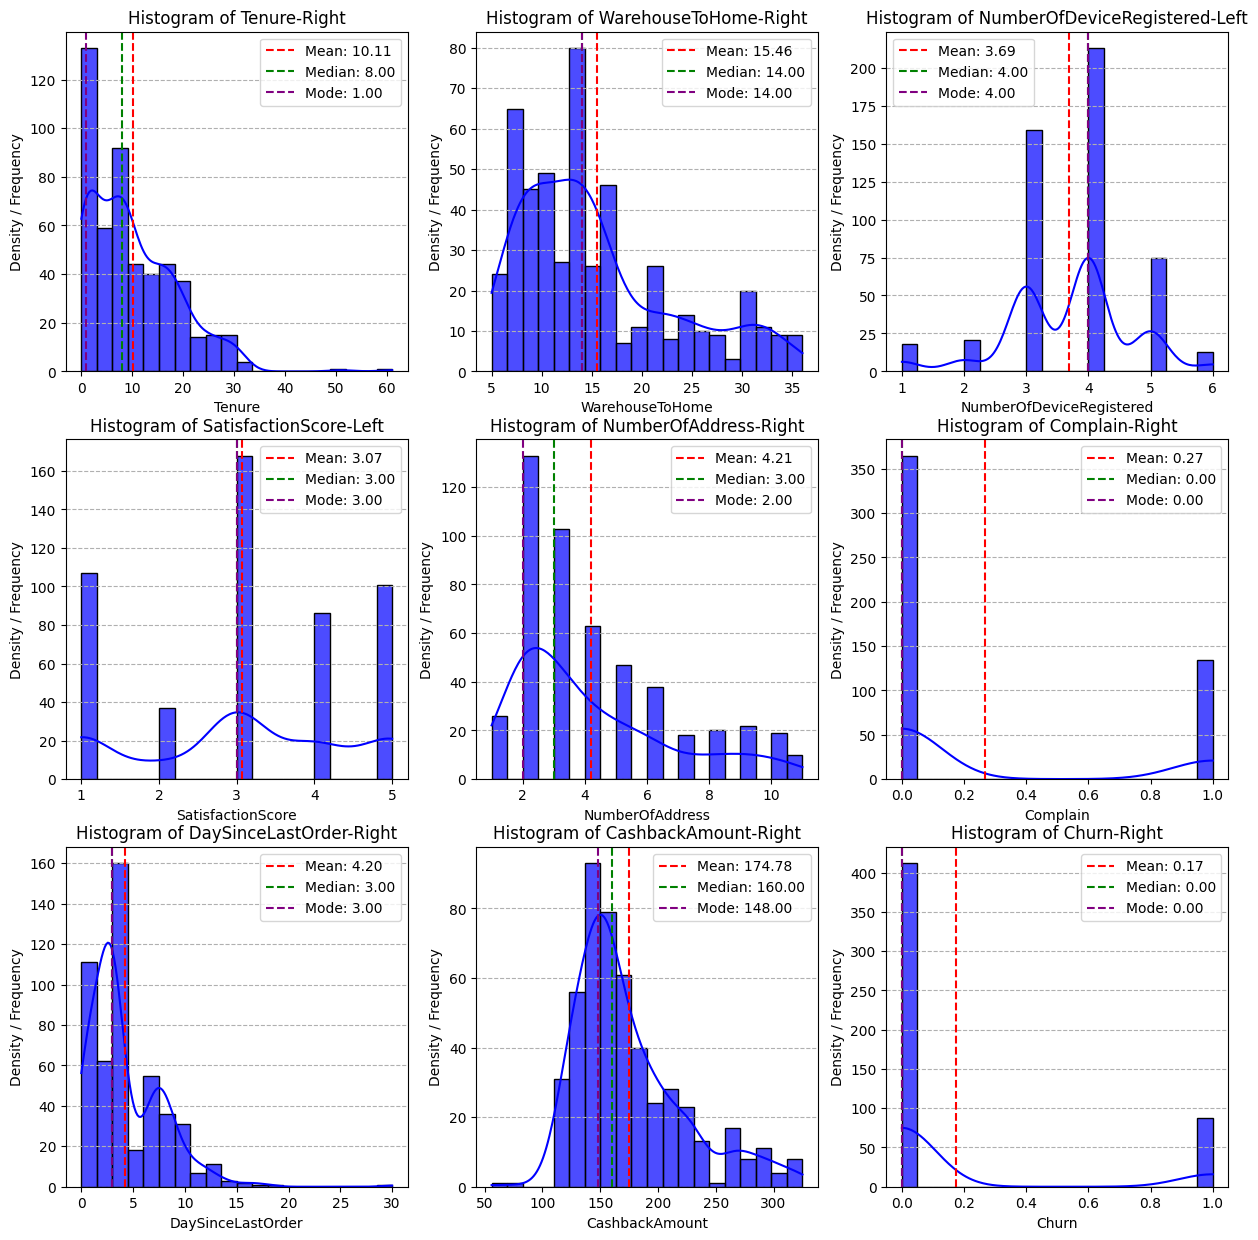

In [4]:
# Univariate Analysis : Plot histograms and check skewness for all numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
rows = (len(numerical_columns) // 3) + (1 if len(numerical_columns) % 3 != 0 else 0)
cols = min(len(numerical_columns), 3)

plt.figure(figsize=(15, rows * 5))
for i, col in enumerate(numerical_columns, 1):
    # Mean, Median, and Skewness Calculation
    mean = df[col].mean()
    median = df[col].median()
    skewness = df[col].skew()

    # Determine skewness type
    if skewness > 0:
        skew='Right'
    elif skewness < 0:
        skew='Left'
    else:
        skew='No skew'

    plt.subplot(rows, cols, i)  
    sns.histplot(df[col], kde=True, bins=20, color='blue', alpha=0.7)
    
    # Add mean, median, and mode lines
    mode_val = df[col].mode()[0]
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
    plt.axvline(mode_val, color='purple', linestyle='--', label=f'Mode: {mode_val:.2f}')
    
    # Titles and labels
    plt.title(f"Histogram of {col}-{skew}")
    plt.xlabel(col)
    plt.ylabel("Density / Frequency")
    plt.legend()
    plt.grid(axis='y', linestyle='--')

#Interpreation : Most columns exhibit right skew, indicating the presence of a few outliers or extreme values.
#Columns like NumberOfDeviceRegistered and SatisfactionScore are less skewed, suggesting more balanced distributions.
#Outliers in CashbackAmount, Churn, and NumberOfDeviceRegistered could represent important anomalies or unique customer behaviors worth investigating further


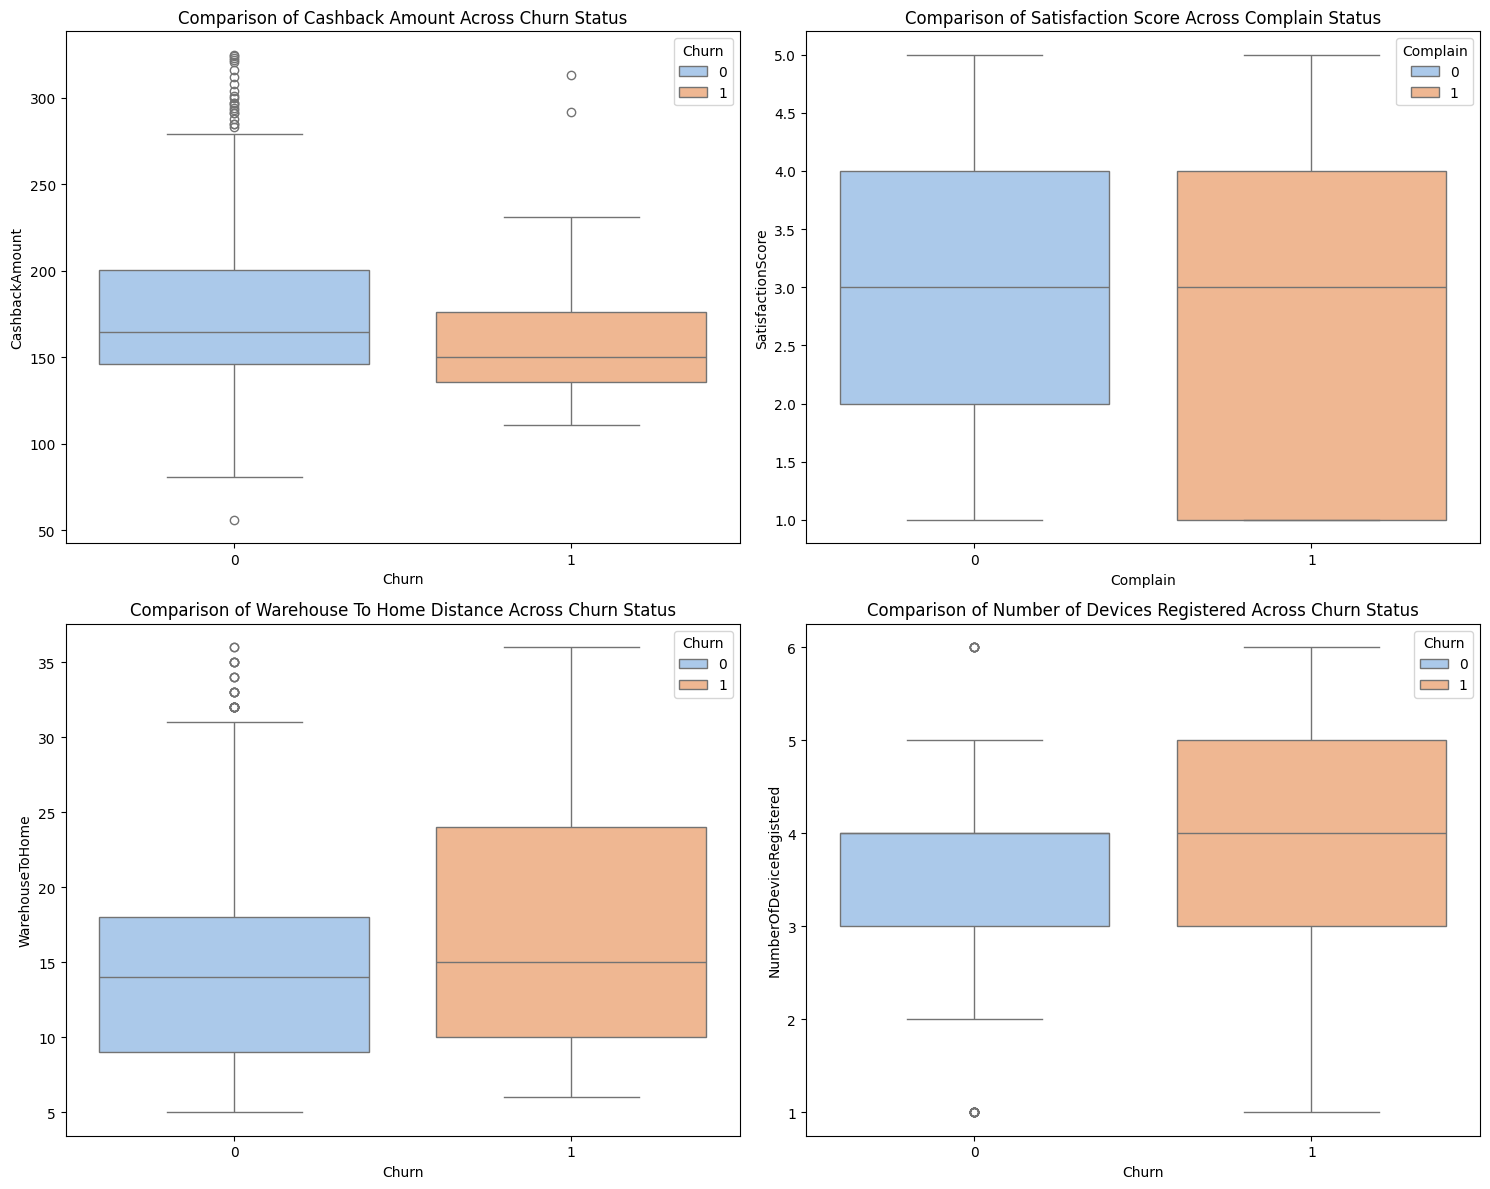

In [5]:
# Generate boxplots for the dataset to analyze relationships and outliers

# Set the pastel color palette
sns.set_palette("pastel")

# Create a figure for boxplots
plt.figure(figsize=(15, 12))

# Boxplot 1: Compare numerical columns (e.g., CashbackAmount) across categorical variables (e.g., Churn)
plt.subplot(2, 2, 1)
sns.boxplot(x='Churn', y='CashbackAmount', data=df, hue='Churn')
plt.title('Comparison of Cashback Amount Across Churn Status')

# Boxplot 2: Compare numerical columns (e.g., SatisfactionScore) across another categorical variable (e.g., Complain)
plt.subplot(2, 2, 2)
sns.boxplot(x='Complain', y='SatisfactionScore', data=df, hue='Complain')
plt.title('Comparison of Satisfaction Score Across Complain Status')

# Boxplot 3: Compare numerical columns (e.g., WarehouseToHome) across a categorical variable (e.g., Churn)
plt.subplot(2, 2, 3)
sns.boxplot(x='Churn', y='WarehouseToHome', data=df, hue='Churn')
plt.title('Comparison of Warehouse To Home Distance Across Churn Status')

# Boxplot 4: Compare numerical columns (e.g., NumberOfDeviceRegistered) across a categorical variable (e.g., Churn)
plt.subplot(2, 2, 4)
sns.boxplot(x='Churn', y='NumberOfDeviceRegistered', data=df, hue='Churn')
plt.title('Comparison of Number of Devices Registered Across Churn Status')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

#interpretation:
#Comparison of Cashback Amount Across Churn Status:
#Dots above the whiskers indicate customers with unusually high cashback amounts.
#The central line in the box shows the typical cashback amount for each churn category.
#SNon-churn customers generally have a narrower range of cashback amounts compared to churned customers.

#Comparison of Satisfaction Score Across Complain Status:
#Few outliers are visible for complain status, showing extreme satisfaction scores.
#Customers with no complaints have slightly higher median satisfaction scores.
#DSatisfaction scores are more varied for customers who have complaints.

#Comparison of Warehouse To Home Distance Across Churn Status:
#There are outliers for longer distances, particularly for non-churn customers.
#Customers who churn tend to have slightly shorter median distances compared to non-churn customers.
#The distance distribution is wider for non-churn customers.

#Comparison of Number of Devices Registered Across Churn Status:
#A few outliers exist for customers registering an unusually high number of devices.
#Non-churn customers tend to register slightly more devices than churned customers.
#The distribution of registered devices is more concentrated for non-churn customers.


C:\Users\HP\AppData\Local\Temp\ipykernel_11380\787208940.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_11380\787208940.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')


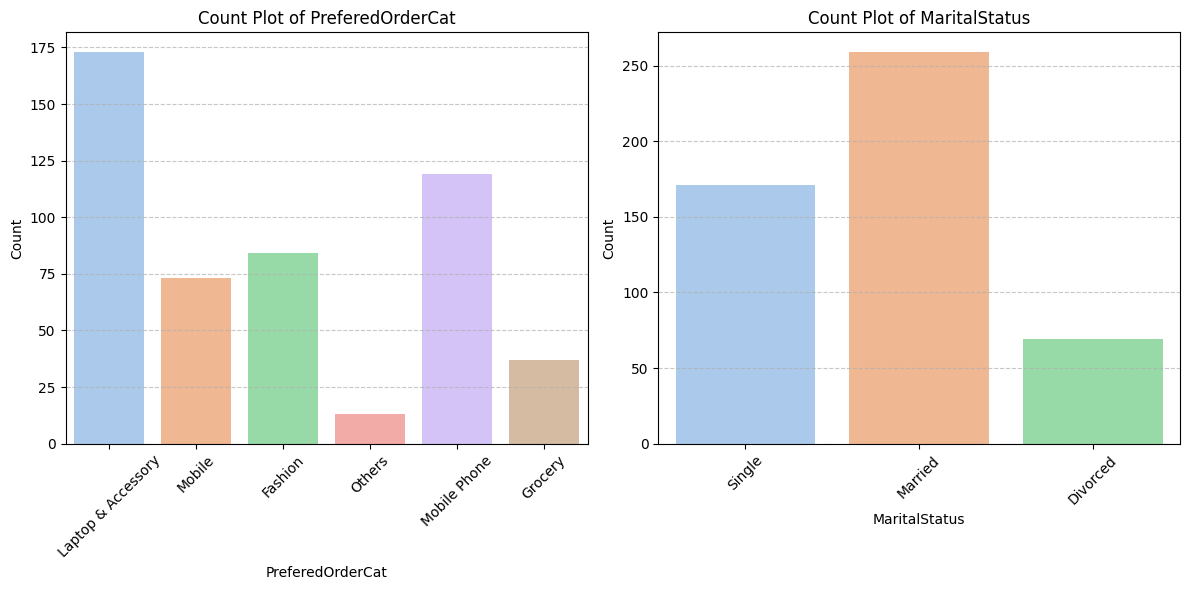

In [6]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plotting count plots for all categorical columns in one figure
plt.figure(figsize=(12, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)  # Adjust the layout for two categorical columns
    sns.countplot(x=column, data=df, palette='pastel')
    plt.title(f"Count Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#PreferedOrderCat:
#The most common category is "Laptop & Accessory."
#Categories such as "Mobile" and "Fashion" are also popular.
#Other categories have relatively lower counts, indicating less preference among users.

#MaritalStatus:

#The majority of the customers are "Married."
#"Single" is the second most common status.
#"Divorced" has the lowest count, suggesting fewer customers in this group.

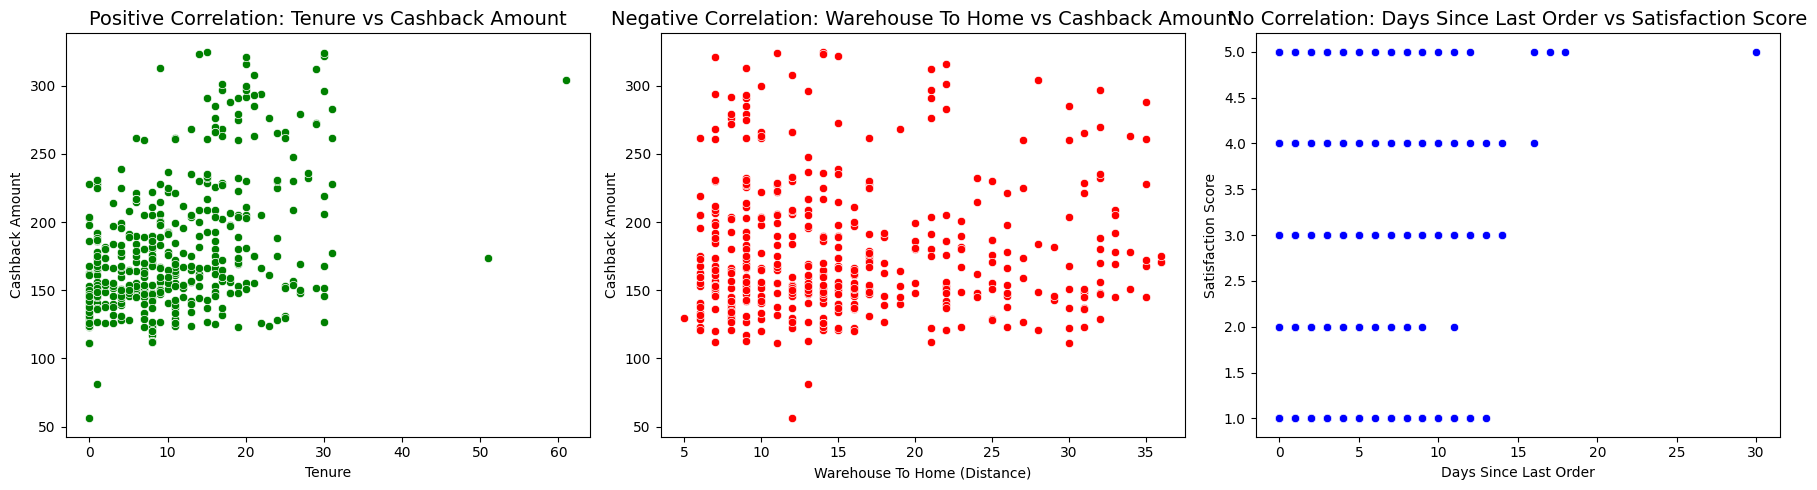

In [7]:
# Displaying the scatter plots to identify correlations in the dataset
plt.figure(figsize=(18, 5))

# Positive Correlation example: CashbackAmount vs. Tenure
plt.subplot(1, 3, 1)
sns.scatterplot(x='Tenure', y='CashbackAmount', data=df, color='green')
plt.title('Positive Correlation: Tenure vs Cashback Amount', fontsize=14)
plt.xlabel('Tenure')
plt.ylabel('Cashback Amount')

# Negative Correlation example: WarehouseToHome vs. CashbackAmount
plt.subplot(1, 3, 2)
sns.scatterplot(x='WarehouseToHome', y='CashbackAmount', data=df, color='red')
plt.title('Negative Correlation: Warehouse To Home vs Cashback Amount', fontsize=14)
plt.xlabel('Warehouse To Home (Distance)')
plt.ylabel('Cashback Amount')

# No Correlation example: DaySinceLastOrder vs. SatisfactionScore
plt.subplot(1, 3, 3)
sns.scatterplot(x='DaySinceLastOrder', y='SatisfactionScore', data=df, color='blue')
plt.title('No Correlation: Days Since Last Order vs Satisfaction Score', fontsize=14)
plt.xlabel('Days Since Last Order')
plt.ylabel('Satisfaction Score')

plt.tight_layout()
plt.show()

#Positive Correlation: Tenure vs Cashback Amount
#As the Tenure increases, the CashbackAmount generally increases.
#This indicates a positive relationship where customers with longer tenure receive higher cashback amounts.

#Negative Correlation: Warehouse To Home vs Cashback Amount
#As the distance (WarehouseToHome) increases, the CashbackAmount decreases.
#This suggests that customers closer to the warehouse tend to receive higher cashback amounts, possibly due to cost savings.

#No Correlation: Days Since Last Order vs Satisfaction Score
#There is no clear trend between DaySinceLastOrder and SatisfactionScore.
#The satisfaction score does not appear to depend on the number of days since the last order.

C:\Users\HP\AppData\Local\Temp\ipykernel_11380\1473455543.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Tenure'])


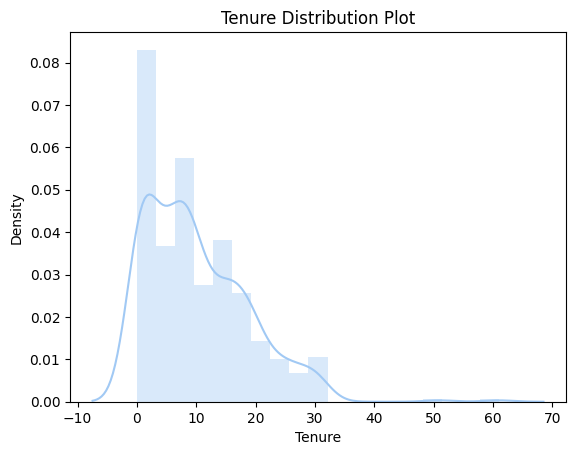

In [8]:
# Data distribution
plt.title('Tenure Distribution Plot')
sns.distplot(df['Tenure'])
plt.show()

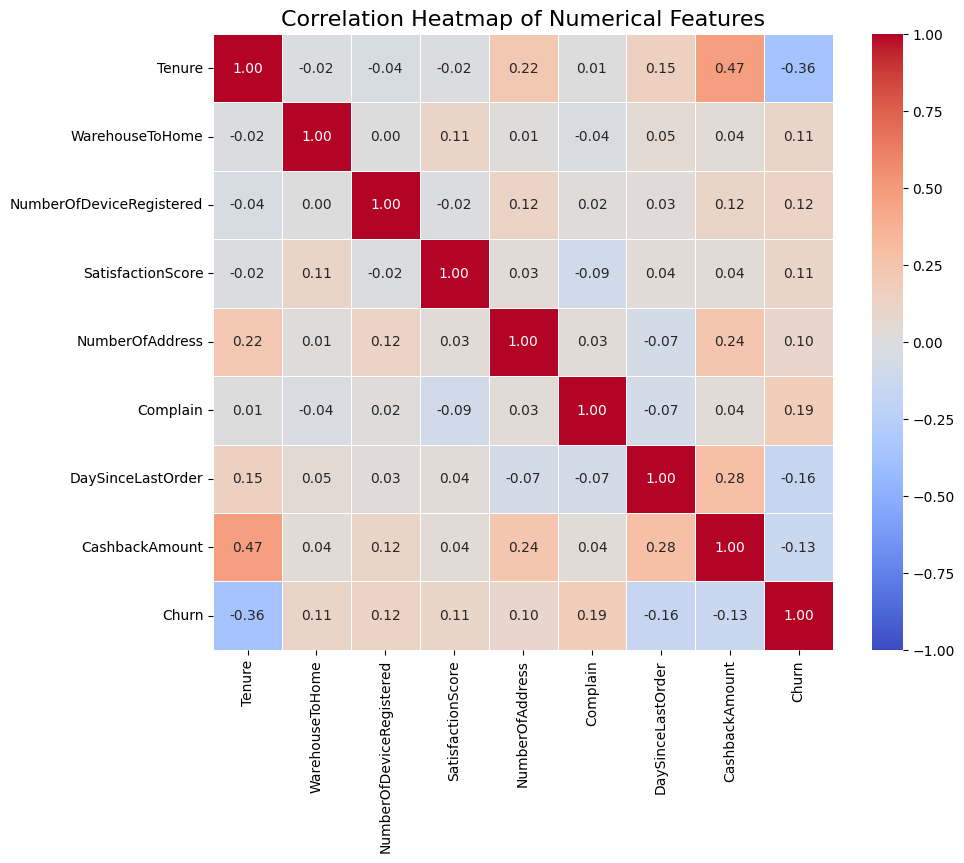

In [9]:
# Generating the correlation heatmap for numerical columns in the dataset
import numpy as np

# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculating the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

#Strong Correlations:
#Tenure and CashbackAmount (0.47): Indicates a moderate positive relationship, suggesting that customers with higher tenure are likely to receive more cashback.
#Tenure and Churn (-0.36): Indicates a moderate negative relationship, meaning that customers with longer tenure are less likely to churn.

#Weak to No Significant Correlations:
#Most other pairs, such as WarehouseToHome and CashbackAmount (0.04) or SatisfactionScore and Churn (0.11), show weak correlations, suggesting minimal or no linear relationships.
#Interesting Observations:

##NumberOfAddress has a small positive correlation with CashbackAmount (0.24), possibly suggesting that customers with multiple addresses receive slightly higher cashback.
#DaySinceLastOrder and CashbackAmount (0.28) show a weak positive correlation, hinting that more time since the last order might result in higher cashback.'''

In [10]:
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder instance
encoder = LabelEncoder()

# Encoding categorical features
df["MaritalStatus"] = encoder.fit_transform(df["MaritalStatus"])
df["PreferedOrderCat"] = encoder.fit_transform(df["PreferedOrderCat"])

# Display the updated DataFrame
print(df.head())

#interpretation:
#Before Encoding:
#MaritalStatus: ['Single', 'Married', 'Divorced']
#PreferedOrderCat: ['Laptop & Accessory', 'Mobile', 'Fashion', 'Others']

#after Encoding:
##MaritalStatus: [0, 1, 2]
#PreferedOrderCat: [0, 1, 2, 3] (encoding order may vary depending on the data).

   Tenure  WarehouseToHome  NumberOfDeviceRegistered  PreferedOrderCat  \
0    15.0             29.0                         4                 2   
1     7.0             25.0                         4                 3   
2    27.0             13.0                         3                 2   
3    20.0             25.0                         4                 0   
4    30.0             15.0                         4                 5   

   SatisfactionScore  MaritalStatus  NumberOfAddress  Complain  \
0                  3              2                2         0   
1                  1              1                2         0   
2                  1              1                5         0   
3                  3              0                7         0   
4                  4              2                8         0   

   DaySinceLastOrder  CashbackAmount  Churn  
0                7.0             143      0  
1                7.0             129      0  
2                7.0

In [11]:
# 1. Check dependent and independent variables
print("Step 1: Variable Information")
print("\nDependent Variable (Target):")
print("Churn")
print("\nIndependent Variables (Features):")
print(df.columns.drop('Churn').tolist())

Step 1: Variable Information

Dependent Variable (Target):
Churn

Independent Variables (Features):
['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']


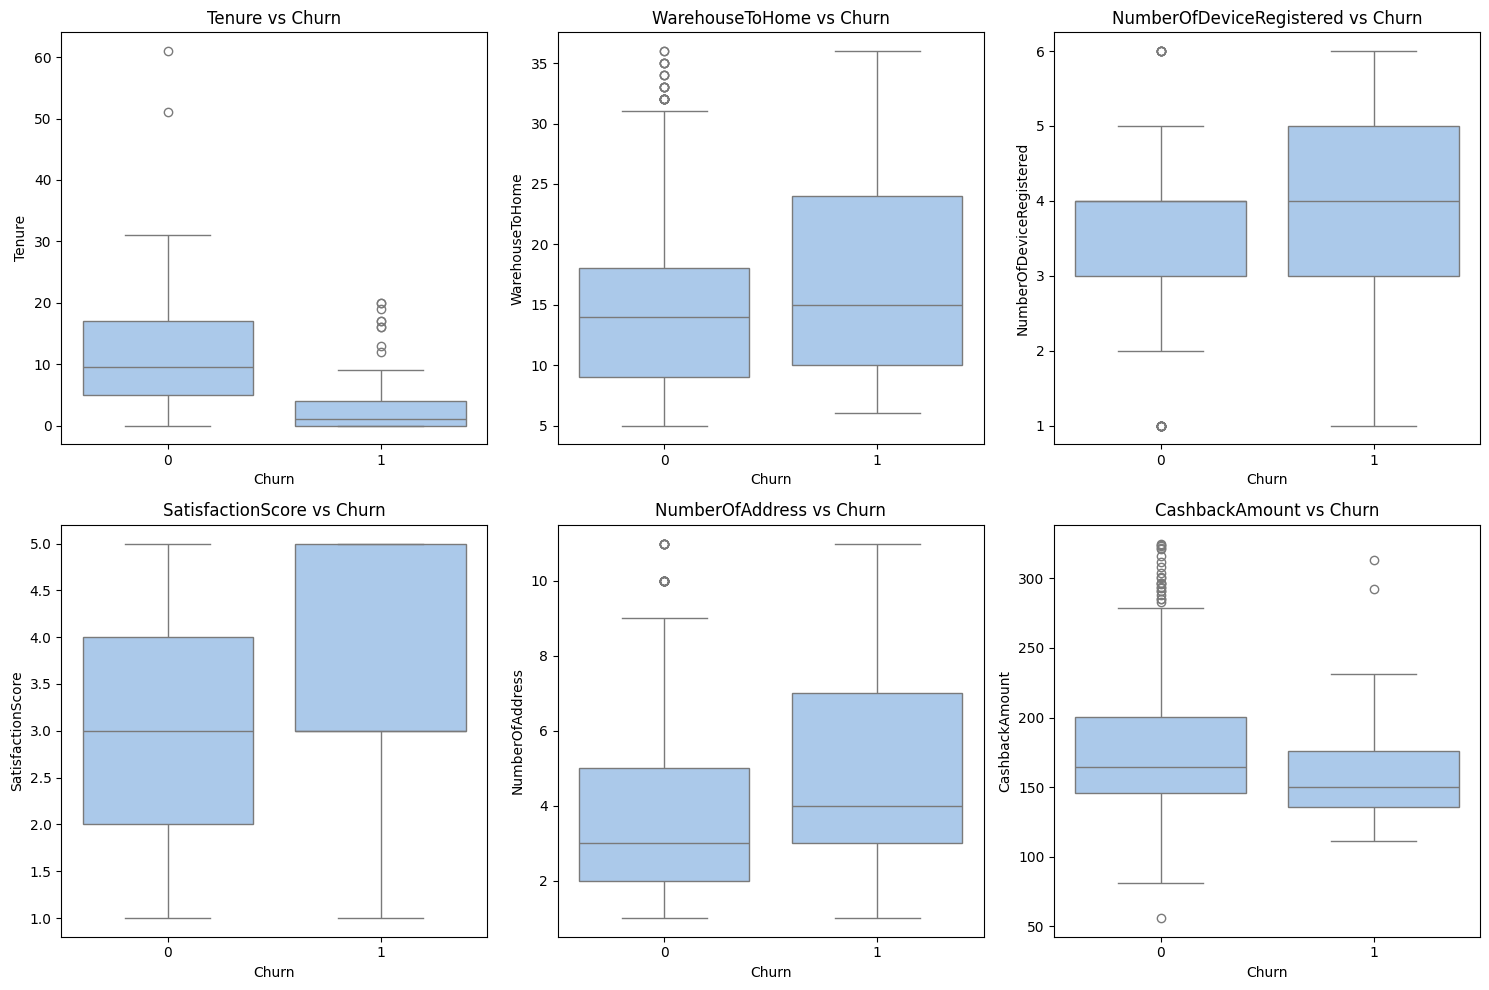

In [12]:
# 2. Visualize the change in variables
plt.figure(figsize=(15, 10))

# Visualize numeric variables
numeric_cols = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 
                'SatisfactionScore', 'NumberOfAddress', 'CashbackAmount']

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')

plt.tight_layout()
plt.show()


#Customers who stay longer (higher tenure) are less likely to churn, indicating loyalty increases over time.
#Newer customers (low tenure) are at a higher risk of churn.
#Outliers (tenure > 50) suggest some long-term customers but are not the norm.


In [13]:
# 3. Divide data into independent and dependent variables
features = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 
           'SatisfactionScore', 'NumberOfAddress', 'Complain', 
           'DaySinceLastOrder', 'CashbackAmount']

X = df[features]
y = df['Churn']

print("\nStep 3: Data Division")
print("Independent variables shape:", X.shape)
print("Dependent variable shape:", y.shape)

#The dataset has been successfully split into features (X) and target (y).
#The number of records in both is the same (499), ensuring no data loss.
#The dependent variable is one-dimensional, confirming that this is a binary classification problem (Churn vs. No Churn).


Step 3: Data Division
Independent variables shape: (499, 8)
Dependent variable shape: (499,)


In [14]:
# 4. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nStep 4: Train-Test Split")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

#Train-Test Ratio: The dataset is split into 80% training (399 samples) and 20% testing (100 samples), which is a standard practice in machine learning.
#The feature count (8 columns) remains the same in both sets


Step 4: Train-Test Split
Training set shape: (399, 8)
Testing set shape: (100, 8)


In [15]:
# 5. Train the algorithm
model = LinearRegression()
model.fit(X_train, y_train)

print("\nStep 5: Model Training Completed")




Step 5: Model Training Completed


In [16]:
# 6. Retrieve intercept and slopes
print("\nStep 6: Model Parameters")
print("Intercept:", model.intercept_)
print("\nSlopes (Coefficients):")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")


#Tenure has a negative coefficient, meaning longer-tenured customers are less likely to churn.
#Complaints have the strongest positive effect on churn, making it a key churn predictor.
#Warehouse distance and the number of devices registered increase churn risk, suggesting potential service or usability issues.
#Satisfaction Score being slightly positive is unusual, indicating that satisfaction alone doesn't guarantee retention.
#Day Since Last Order’s negative coefficient suggests that regular customers may be more stable.


Step 6: Model Parameters
Intercept: -0.11434865575953312

Slopes (Coefficients):
Tenure: -0.0173
WarehouseToHome: 0.0080
NumberOfDeviceRegistered: 0.0238
SatisfactionScore: 0.0261
NumberOfAddress: 0.0299
Complain: 0.1749
DaySinceLastOrder: -0.0091
CashbackAmount: 0.0002



Step 7: Sample Predictions

First 5 Predictions:
Predicted Values: [ 0.12412616 -0.02961213  0.23922773 -0.04023441  0.01178987]
Actual Values: [0 0 0 0 0]


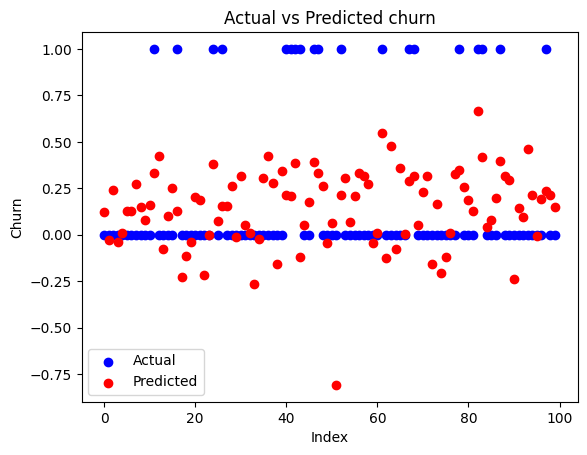

In [19]:
# 7. Make predictions
y_pred = model.predict(X_test)

print("\nStep 7: Sample Predictions")
print("\nFirst 5 Predictions:")
print("Predicted Values:", y_pred[:5])
print("Actual Values:", y_test.iloc[:5].values)

# Visualize the results
predicted_values = model.predict(X_test)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predicted_values)), predicted_values, color='red', label='Predicted')
plt.title("Actual vs Predicted churn")
plt.xlabel("Index")
plt.ylabel("Churn")
plt.legend()
plt.show()


#The model is correctly predicting non-churn cases.
#Predictions are relatively small values, meaning the model is not making strong classifications.


Step 9: Model Evaluation
R-squared Score: 0.10308740680376771
Mean Squared Error: 0.13803484809290015
Root Mean Squared Error: 0.37153041341577964


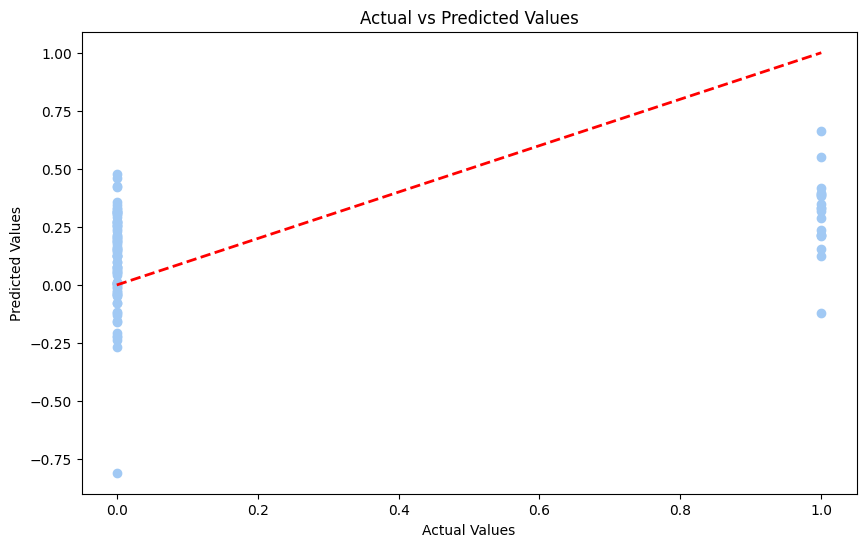

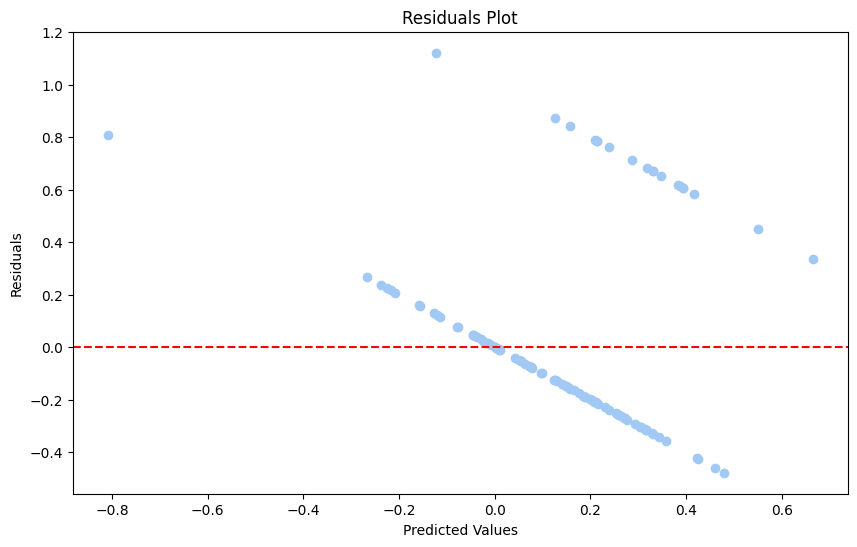

In [20]:
# 8. Evaluate the algorithm
print("\nStep 9: Model Evaluation")
print("R-squared Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Visualization of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

#Looking at the Actual vs Predicted Values plot, this model shows poor predictive performance. 
#The scatter points form two distinct vertical clusters (a+round 0.0 and 1.0 on the actual values axis) rather than following the ideal red dashed line, indicating that the model is essentially making binary predictions instead of providing nuanced probability estimates. 
#This suggests the model has failed to capture the underlying patterns in the data and is instead defaulting to extreme predictions. 
#The significant deviation of points from the diagonal red line indicates low accuracy and poor model fit.